In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
diamonds = pd.read_csv('./kickoff/diamonds.csv')

In [7]:
ricks_diamonds = pd.read_csv('./kickoff/rick_diamonds.csv')

# Rough mean (with outliers)

In [29]:
diamonds.price.mean()

3934.409644462607

## Median

In [28]:
diamonds.price.median()

2401.0

In [20]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


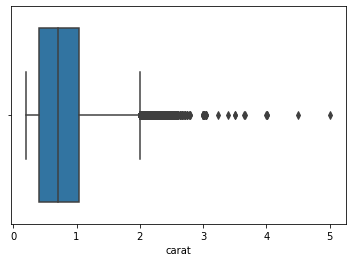

In [24]:
sns.boxplot(diamonds.carat)

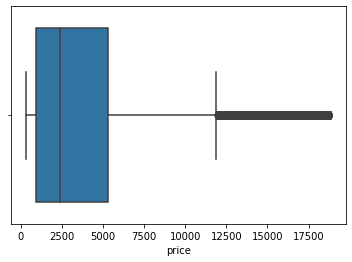

In [25]:
sns.boxplot(diamonds.price)

# EDA 

In [9]:
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [10]:
ricks_diamonds

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71


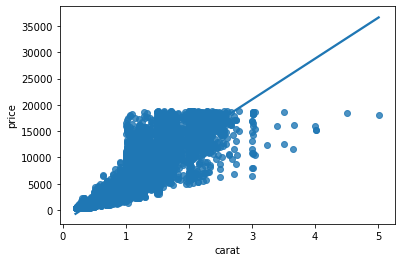

In [17]:
sns.regplot('carat', 'price',data=diamonds)

In [21]:
ricks_diamonds.describe()

,carat,depth,table,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000
